In [74]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [75]:
data=pd.read_csv(r'C:\Users\zbook g6\Desktop\DEBI-ONL4_AIS2_S2\DEBI-ONL4_AIS2_S2\src\machine_learning\data_analysis\session_17\Social_Network_Ads.csv')

In [76]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [77]:
x = data.iloc[ : , [2,3]]
y = data. iloc[ :, 4]

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [80]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)


In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [82]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  2],
       [ 9, 19]])

In [83]:
TP,FP,FN,TN=cm.ravel()


In [84]:
def accuracy_sc(TP,FP,FN,TN):
    return (TP+TN)/(TP+FP+FN+TN)

In [85]:
accuracy_sc(TP,FP,FN,TN)

np.float64(0.8625)

In [86]:
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
f1_sc=f1_score(y_test,y_pred)
print('accuracy',acc)
print('recall_score',recall)
print('precision_score',precision)
print('f1_score',f1_sc)

accuracy 0.8625
recall_score 0.6785714285714286
precision_score 0.9047619047619048
f1_score 0.7755102040816326


C:\Users\zbook g6\AppData\Local\Temp\ipykernel_27712\2822685888.py:19: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],


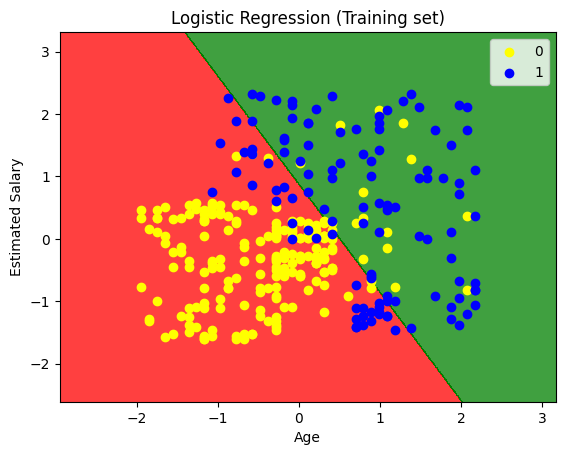

In [87]:
import numpy as np
import matplotlib.pyplot as plt # التغيير هنا
from matplotlib.colors import ListedColormap

# تأكدي إنك عملتي Run لخلية الـ StandardScaler الأول على جهازك الـ zbook g6
X_Set, Y_Set = x_train, y_train 

X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:,1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))

# دلوقتي plt.contourf هتشتغل عادي
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('yellow', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()